In [1]:
import numpy as np
import pandas as pd
import xarray as xr
import math
import dask
import glob
import seaborn as sns
import seaborn as sns
import matplotlib.pyplot as plt
import cartopy.crs as ccrs

In [2]:
from dask.distributed import Client, LocalCluster
if __name__ == "__main__":
    cluster=LocalCluster(host="tcp://127.0.0.1:2472",dashboard_address="127.0.0.1:2482",n_workers=4)
    client = Client(cluster)

In [6]:
x = xr.open_mfdataset('../FRONT_FILES/2deg/3-hourly/ERA5_seasonal_fronts_2deg.nc').front

In [7]:
day_zero = x.sel(time=slice('2015-01-01', '2017-12-31'))
day_zero = day_zero.groupby(day_zero.time.dt.season).mean(dim='time')
ref = x.groupby(dic[model].time.dt.season).mean(dim='time')

In [8]:
anom = day_zero - ref
levels = np.linspace(-0.1,0.1,101)

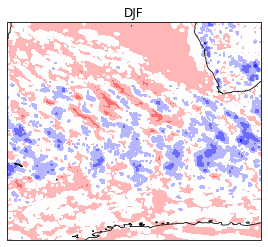

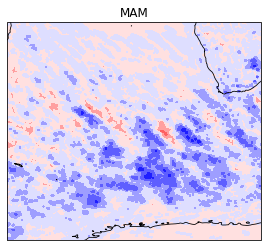

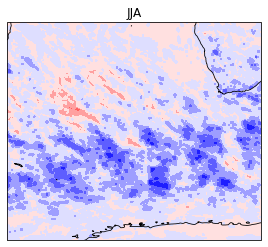

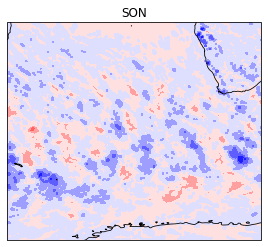

In [10]:
for seas in ['DJF','MAM','JJA','SON']:
    x = anom.sel(season = seas)
    ax = plt.axes(projection=ccrs.PlateCarree())
    ax.coastlines('50m', linewidth=0.8)
    a = ax.contourf(x.lon.values,x.lat.values,x.values, cmap = 'bwr_r')
    for c in a.collections:
        c.set_edgecolor("face")
    plt.title(str(seas))
    #plt.colorbar(a)
    plt.savefig('../FRONT_OUT/D0_anom_'+str(seas)+".png")
    plt.savefig('../FRONT_OUT/D0_anom_'+str(seas)+".pdf")
    plt.show()

In [11]:
plt.colorbar(a,orientation = 'horizontal')
plt.savefig('../FRONT/FRONT_OUT/D0_anom_cbar.pdf')
plt.close()

In [12]:
x = dic[model].sel(lat=-35).sel(lon=17)

In [13]:
D0 = x.sel(time=slice('2015-01-01', '2017-12-31'))

In [14]:
y = list(D0.round(1).values)
check = []
check2 = []
new = []
for i in y:
    if i not in check:
        check.append(i)
        new.append(.01)
    elif i not in check2:
        new.append(.02)
        check2.append(i)
    else:
        new.append(.03)

In [25]:
new = xr.DataArray(new,dims=("time"),coords={"time":D0.time.values})

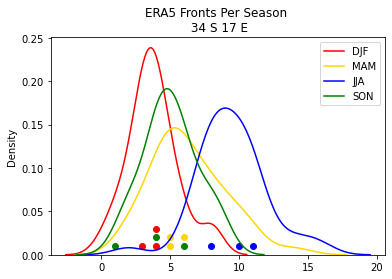

In [29]:
plt.figure()
for seas,col in zip(['DJF','MAM','JJA','SON'],['red','gold','blue','green']):
    sns.kdeplot(x.where(x.time.dt.season == seas).dropna(dim='time',how='all'),color=col,label =str(seas))
    plt.scatter(x = D0.where(D0.time.dt.season == seas).dropna(dim='time',how='all'),y = new.where(new.time.dt.season == seas).dropna(dim='time',how='all') , color=col)

plt.legend()
plt.title('ERA5 Fronts Per Season \n 34 S 17 E')
plt.savefig('../FRONT_OUT/D0_kde_plot.png')
plt.savefig('../FRONT_OUT/D0_kde_plot.pdf')

In [185]:
client.close()